## EDA of the Taxi Data :

### Install & Import libraries:

In [ ]:
! pip install tensorflow-data-validation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.5/22.5 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━

In [ ]:
! pip install --upgrade pyarrow tensorflow tensorflow-data-validation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 12.4 MB/s eta 0:00:00


In [ ]:
! pip install apache-beam

In [ ]:
! pip install graphviz

In [ ]:
! pip install fastparquet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.3 MB/s eta 0:00:00


After installing the libraries, we needed to restart the kernel before running the import commands.

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_data_validation as tfdv
from datetime import datetime
import folium
import apache_beam as beam
import pyarrow as pa
import graphviz

In [ ]:
parquet_file_path_march = '/content/yellow_tripdata_2020-03.parquet'

csv_output_path_march = '/content/yellow_tripdata_2020-03.csv'

parquet_file_path_may = '/content/yellow_tripdata_2020-05.parquet'

csv_output_path_may = '/content/yellow_tripdata_2020-05.csv'

In [ ]:
# converting March data - training data
taxi_data_march = pd.read_parquet(parquet_file_path_march, engine='fastparquet')
taxi_data_march.to_csv(csv_output_path_march, index=False)

# converting may data - test data
taxi_data_may = pd.read_parquet(parquet_file_path_may, engine='fastparquet')
taxi_data_may.to_csv(csv_output_path_may, index=False)

#viewing first 5 records of marchh data and then that of may
taxi_data_march.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1,22.0,3.0,0.5,2.00,0.0,0.3,27.80,2.5,NaN
1,2,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0,NaN
2,1,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5,NaN
3,2,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5,NaN
4,1,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5,NaN


In [ ]:
taxi_data_may.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-05-01 00:02:28,2020-05-01 00:18:07,1.0,0.0,1.0,N,234,256,1,12.2,3.0,0.5,2.4,0.0,0.3,18.4,2.5,NaN
1,1,2020-05-01 00:23:21,2020-05-01 00:26:01,2.0,0.4,1.0,N,264,264,1,4.0,0.5,0.5,0.5,0.0,0.3,5.8,0.0,NaN
2,1,2020-05-01 00:54:58,2020-05-01 00:57:11,1.0,0.3,1.0,N,264,264,2,3.5,0.5,0.5,0.0,0.0,0.3,4.8,0.0,NaN
3,1,2020-05-01 00:07:10,2020-05-01 00:12:46,1.0,1.7,1.0,N,107,229,2,7.0,3.0,0.5,0.0,0.0,0.3,10.8,2.5,NaN
4,1,2020-05-01 00:55:47,2020-05-01 01:01:54,0.0,0.9,1.0,N,237,262,1,6.0,3.0,0.5,1.2,0.0,0.3,11.0,2.5,NaN


Checking if both the dataframes have the same columns.

In [ ]:
taxi_data_march.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [ ]:
taxi_data_may.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

Checking datatypes of the features : It is done for only march dataframe as the features are same.

In [ ]:
taxi_data_march.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

Checking NAN or NULL values :

In [ ]:
# for march data
count_of_null_march = taxi_data_march.isna().sum()
print(count_of_null_march)

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            37808
trip_distance                  0
RatecodeID                 37808
store_and_fwd_flag         37808
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       37808
airport_fee              3007687
dtype: int64


In [ ]:
#for the may data
count_of_null_may = taxi_data_may.isna().sum()
print(count_of_null_may)

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count           58901
trip_distance                 0
RatecodeID                58901
store_and_fwd_flag        58901
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge      58901
airport_fee              348415
dtype: int64


## Preppingng the data:

In [ ]:
# removing the nan & null values for both the dfs
taxi_data_march.shape

(3007687, 19)

In [ ]:
taxi_data_may.shape

(348415, 19)

In [ ]:
# Through this we can find out the features that can be dropped and modified,
# the entire column airport_fee is empty and hence can be dropped

taxi_data_march = taxi_data_march.drop(['airport_fee'], axis=1)
taxi_data_march.isna().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          37808
trip_distance                0
RatecodeID               37808
store_and_fwd_flag       37808
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     37808
dtype: int64

In [ ]:
# the entire column airport_fee is empty here as well and hence can be dropped

taxi_data_may = taxi_data_may.drop(['airport_fee'], axis=1)
taxi_data_may.isna().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          58901
trip_distance                0
RatecodeID               58901
store_and_fwd_flag       58901
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     58901
dtype: int64

In [ ]:
# this is to check if all the nan values are in
# the same row
def dropping_empty_records(taxi_data):
  missing_values_mask = taxi_data.isna()
  rows_with_4_missing = missing_values_mask.sum(axis=1) == 4
  # Filter the DataFrame to remove rows with 4 missing values
  taxi_data = taxi_data[~rows_with_4_missing]
  return taxi_data

taxi_data_march = dropping_empty_records(taxi_data_march)
taxi_data_march.shape

(2969879, 18)

In [ ]:
#dropping those values by calling a method
taxi_data_may = dropping_empty_records(taxi_data_may)
taxi_data_may.shape

(289514, 18)

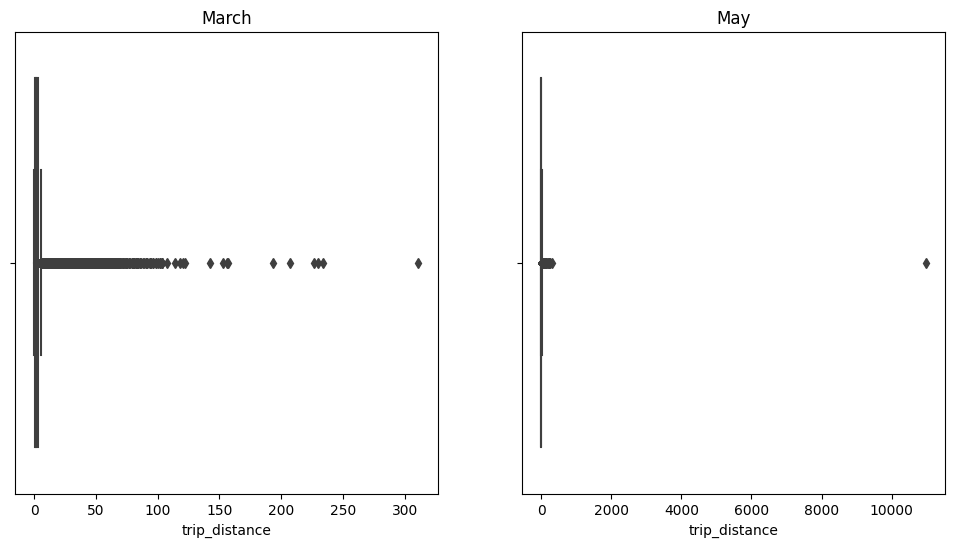

In [ ]:
# Find outliers for both the dataframes
# side by side plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# boxplot for March data
sns.boxplot(x=taxi_data_march['trip_distance'], ax=axes[0])
axes[0].set_title('March')

# boxplot for May data
sns.boxplot(x=taxi_data_may['trip_distance'], ax=axes[1])
axes[1].set_title('May')

# Display the plots for side by side comparison
plt.show()

In [ ]:
# function remove outliers based on the IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [ ]:
# Remove outliers from the March and May data
taxi_data_march_clean = remove_outliers_iqr(taxi_data_march, 'trip_distance')
taxi_data_may_clean = remove_outliers_iqr(taxi_data_may, 'trip_distance')

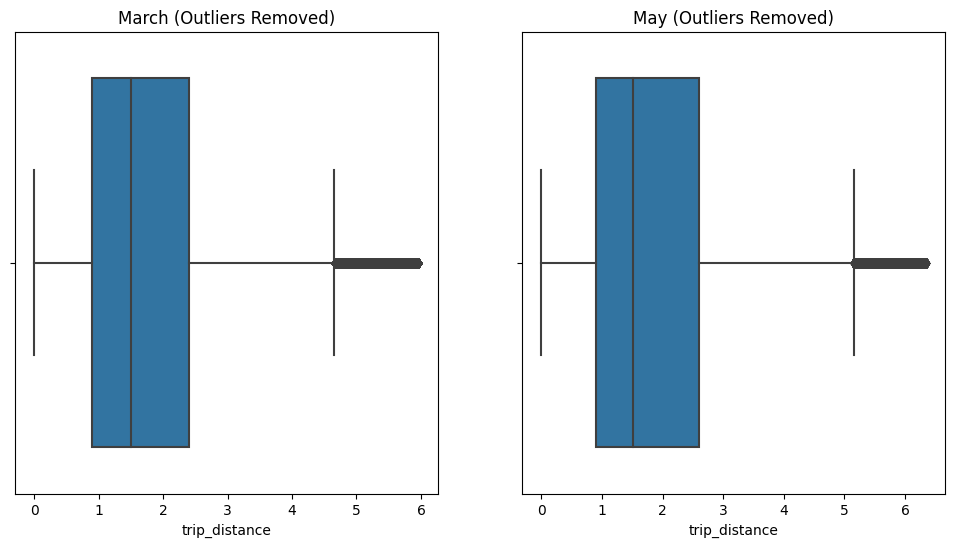

In [ ]:
# Side-by-side# Side by side plotting for cleaned data
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for cleaned March data
sns.boxplot(x=taxi_data_march_clean['trip_distance'], ax=axes[0])
axes[0].set_title('March (Outliers Removed)')

# Boxplot for cleaned May data
sns.boxplot(x=taxi_data_may_clean['trip_distance'], ax=axes[1])
axes[1].set_title('May (Outliers Removed)')

# Display the plots for side-by-side comparison without outliers
plt.show()

In [ ]:
# A method for converting date column into date-time format
def transform_taxi_data(data):
    # Convert date columns to datetime
    data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
    data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

    # Convert 'store_and_fwd_flag' values into numeric (0 for 'N' and 1 for 'Y')
    data['store_and_fwd_flag'] = (data['store_and_fwd_flag'] == 'Y').astype(int)

    return data

transformed_taxi_data_march = transform_taxi_data(taxi_data_march)
transformed_taxi_data_march.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,0,88,255,1,22.0,3.0,0.5,2.00,0.0,0.3,27.80,2.5
1,2,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,0,193,193,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0
2,1,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,0,246,90,1,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5
3,2,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,0,151,238,1,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5
4,1,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,0,79,261,1,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5


In [ ]:
# transformation applied to may dataframe as well
transformed_taxi_data_may = transform_taxi_data(taxi_data_may)
transformed_taxi_data_may.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-05-01 00:02:28,2020-05-01 00:18:07,1.0,0.0,1.0,0,234,256,1,12.2,3.0,0.5,2.4,0.0,0.3,18.4,2.5
1,1,2020-05-01 00:23:21,2020-05-01 00:26:01,2.0,0.4,1.0,0,264,264,1,4.0,0.5,0.5,0.5,0.0,0.3,5.8,0.0
2,1,2020-05-01 00:54:58,2020-05-01 00:57:11,1.0,0.3,1.0,0,264,264,2,3.5,0.5,0.5,0.0,0.0,0.3,4.8,0.0
3,1,2020-05-01 00:07:10,2020-05-01 00:12:46,1.0,1.7,1.0,0,107,229,2,7.0,3.0,0.5,0.0,0.0,0.3,10.8,2.5
4,1,2020-05-01 00:55:47,2020-05-01 01:01:54,0.0,0.9,1.0,0,237,262,1,6.0,3.0,0.5,1.2,0.0,0.3,11.0,2.5


In [ ]:
# Explore the data and find the stats
summary_stats = transformed_taxi_data_march.describe()
print("Summary Statistics for March:")
print(summary_stats)

Summary Statistics for March:
           VendorID  passenger_count  trip_distance    RatecodeID  \
count  2.969879e+06     2.969879e+06   2.969879e+06  2.969879e+06   
mean   1.667225e+00     1.467477e+00   2.822216e+00  1.051377e+00   
std    4.712068e-01     1.120087e+00   3.613061e+00  7.109214e-01   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   9.900000e-01  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.640000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   2.980000e+00  1.000000e+00   
max    2.000000e+00     9.000000e+00   3.109000e+02  9.900000e+01   

       store_and_fwd_flag  PULocationID  DOLocationID  payment_type  \
count        2.969879e+06  2.969879e+06  2.969879e+06  2.969879e+06   
mean         9.421596e-03  1.637612e+02  1.613286e+02  1.267748e+00   
std          9.660659e-02  6.640310e+01  7.059620e+01  4.765076e-01   
min          0.000000e+00  1.000000e+00  1.000000e+00  1.000000e

In [ ]:
# Explore the data and find the stats
summary_stats = transformed_taxi_data_may.describe()
print("Summary Statistics for May:")
print(summary_stats)

Summary Statistics for May:
            VendorID  passenger_count  trip_distance     RatecodeID  \
count  289514.000000    289514.000000  289514.000000  289514.000000   
mean        1.564073         1.314171       2.730891       1.043062   
std         0.495879         0.983983      20.694756       0.969450   
min         1.000000         0.000000       0.000000       1.000000   
25%         1.000000         1.000000       0.940000       1.000000   
50%         2.000000         1.000000       1.700000       1.000000   
75%         2.000000         1.000000       3.100000       1.000000   
max         2.000000         9.000000   10973.550000      99.000000   

       store_and_fwd_flag   PULocationID   DOLocationID   payment_type  \
count       289514.000000  289514.000000  289514.000000  289514.000000   
mean             0.009765     157.154842     151.587930       1.423195   
std              0.098333      70.259234      74.551999       0.554251   
min              0.000000       1.00

In [ ]:
# correlation between all the data

correlation_matrix_march = transformed_taxi_data_march.corr()
correlation_matrix_march

<ipython-input-29-565a856279a0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_march = transformed_taxi_data_march.corr()


,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
VendorID,1.000000,0.194235,0.028712,0.010018,-0.132792,-0.011733,-0.004230,-0.012578,-0.000388,-0.003301,0.000401,0.019822,0.008024,-0.043897,0.000203,-0.017094
passenger_count,0.194235,1.000000,0.010871,-0.002580,-0.027061,-0.005066,-0.002883,0.002526,0.001039,-0.000944,-0.000241,0.001919,0.007062,0.007362,0.000423,0.011654
trip_distance,0.028712,0.010871,1.000000,0.145445,-0.000959,-0.088357,-0.099015,-0.002291,0.024965,-0.000518,-0.000465,0.472500,0.540998,0.015217,0.016471,-0.188547
RatecodeID,0.010018,-0.002580,0.145445,1.000000,0.004184,-0.009888,0.002097,0.008858,0.007252,0.079838,0.079901,0.135321,0.158268,-0.036118,0.071179,-0.100940
store_and_fwd_flag,-0.132792,-0.027061,-0.000959,0.004184,1.000000,0.002937,0.008073,0.014491,0.000034,0.000423,-0.000056,-0.007767,0.000610,0.002645,-0.000060,-0.004090
PULocationID,-0.011733,-0.005066,-0.088357,-0.009888,0.002937,1.000000,0.107228,-0.043773,-0.002142,0.000392,0.000257,-0.017606,-0.038066,0.005412,-0.000990,0.148262
DOLocationID,-0.004230,-0.002883,-0.099015,0.002097,0.008073,0.107228,1.000000,-0.042222,-0.002504,0.000368,0.000265,-0.022701,-0.051568,0.002910,-0.001248,0.135195
payment_type,-0.012578,0.002526,-0.002291,0.008858,0.014491,-0.043773,-0.042222,1.000000,0.001990,0.000722,0.000837,-0.446302,-0.022321,-0.257574,-0.000271,-0.241181
fare_amount,-0.000388,0.001039,0.024965,0.007252,0.000034,-0.002142,-0.002504,0.001990,1.000000,-0.000015,-0.000015,0.014522,0.015270,0.003727,0.557450,-0.004990
extra,-0.003301,-0.000944,-0.000518,0.079838,0.000423,0.000392,0.000368,0.000722,-0.000015,1.000000,0.999991,-0.000379,-0.000135,-0.004312,0.830179,-0.000883


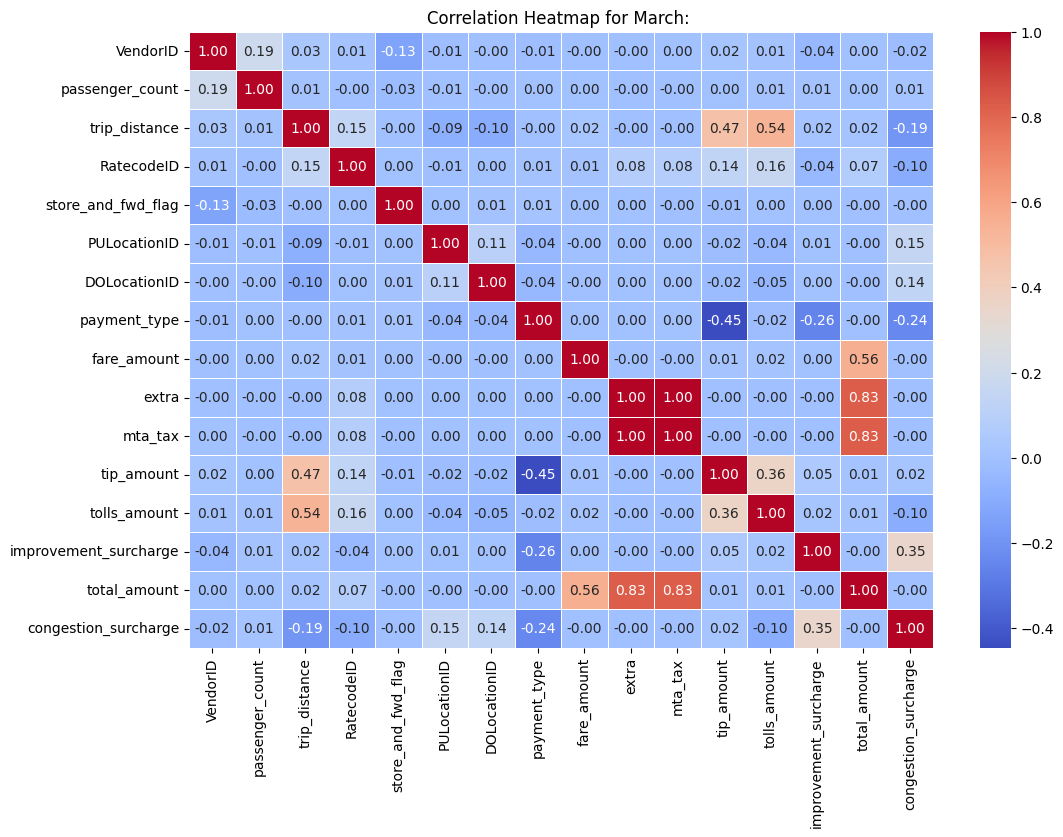

In [ ]:
# Create a heatmap of the above correlation for March df
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_march, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for March: ')
plt.show()

In [ ]:
# for may df
correlation_matrix_may = transformed_taxi_data_may.corr()
correlation_matrix_may

<ipython-input-31-9b6d00434e3e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_may = transformed_taxi_data_may.corr()


,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
VendorID,1.000000,0.247407,0.011503,0.009906,-0.110763,-0.017688,-0.004082,-0.021437,-0.002043,-0.795721,-0.045143,0.026747,0.011616,-0.062641,-0.001936,-0.009815
passenger_count,0.247407,1.000000,0.002001,-0.009414,-0.023567,-0.008872,-0.000631,-0.011436,-0.000578,-0.201679,0.008788,0.004849,-0.000410,0.004417,-0.000557,0.004566
trip_distance,0.011503,0.002001,1.000000,0.014609,-0.000443,-0.008346,-0.009201,-0.002409,0.001818,-0.002557,-0.000333,0.052274,0.069594,0.002701,0.002106,-0.004287
RatecodeID,0.009906,-0.009414,0.014609,1.000000,0.010662,-0.000115,0.010794,0.004146,0.189353,-0.006504,-0.108906,0.024558,0.057617,-0.066910,0.189436,-0.059389
store_and_fwd_flag,-0.110763,-0.023567,-0.000443,0.010662,1.000000,-0.002666,0.007831,0.020003,-0.000057,0.083939,-0.010573,-0.010554,0.002280,-0.001952,-0.000097,-0.008690
PULocationID,-0.017688,-0.008872,-0.008346,-0.000115,-0.002666,1.000000,0.138050,-0.066549,-0.001100,0.082270,0.007594,0.034210,-0.023554,0.007384,-0.000740,0.243002
DOLocationID,-0.004082,-0.000631,-0.009201,0.010794,0.007831,0.138050,1.000000,-0.064248,-0.000951,0.060858,0.002374,0.030640,-0.015547,0.002996,-0.000655,0.182878
payment_type,-0.021437,-0.011436,-0.002409,0.004146,0.020003,-0.066549,-0.064248,1.000000,0.004318,-0.033989,-0.224137,-0.446757,-0.027766,-0.247986,0.002454,-0.204308
fare_amount,-0.002043,-0.000578,0.001818,0.189353,-0.000057,-0.001100,-0.000951,0.004318,1.000000,0.092496,-0.010485,0.003202,0.005706,-0.010460,0.999991,-0.005076
extra,-0.795721,-0.201679,-0.002557,-0.006504,0.083939,0.082270,0.060858,-0.033989,0.092496,1.000000,0.090666,0.039611,-0.030367,0.082203,0.093166,0.325858


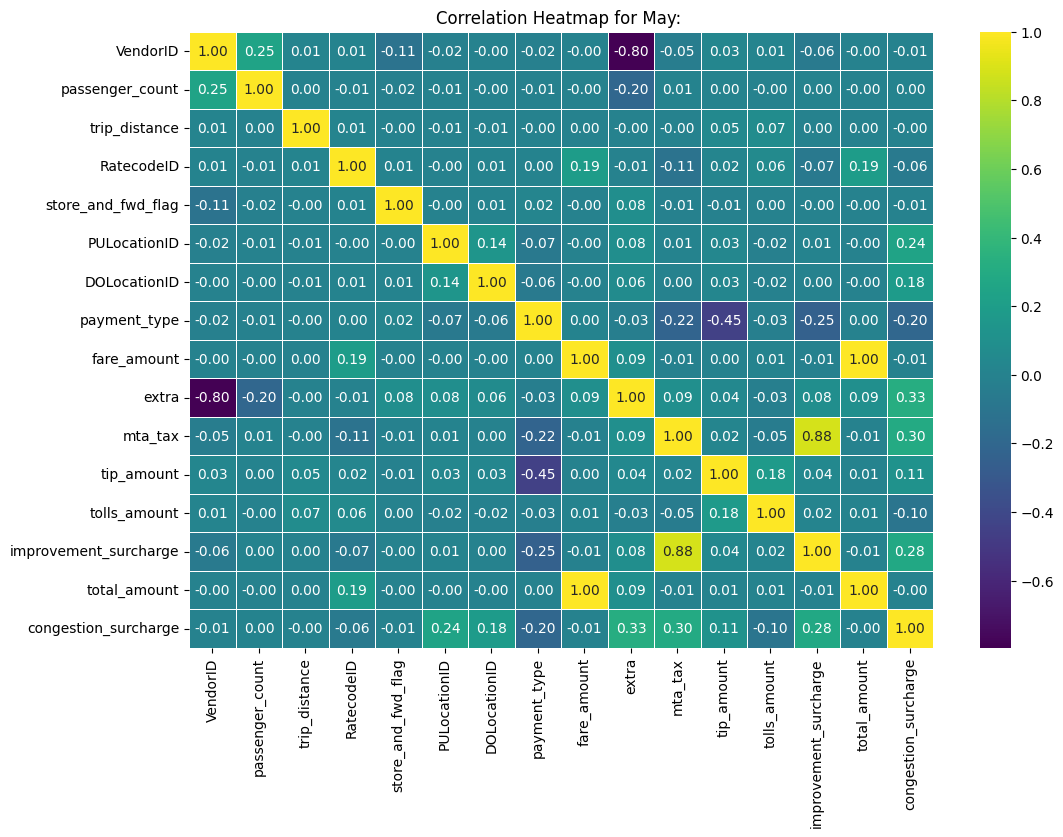

In [ ]:
# Create a heatmap for may
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_may, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for May: ')
plt.show()

By getting the above heatmaps we can find the affinity of each feature with the others. This will help during feature engineering & importance. By obtaining this information we can understand our data better as well as fine-tune our model in the later stages.

In [ ]:
# Calculate the difference between the two correlation matrices
correlation_difference = correlation_matrix_march - correlation_matrix_may

# Print the correlation difference
print("Correlation Difference between March and May:")
print(correlation_difference)

Correlation Difference between March and May:
                       VendorID  passenger_count  trip_distance  RatecodeID  \
VendorID               0.000000        -0.053172       0.017209    0.000112   
passenger_count       -0.053172         0.000000       0.008870    0.006833   
trip_distance          0.017209         0.008870       0.000000    0.130836   
RatecodeID             0.000112         0.006833       0.130836    0.000000   
store_and_fwd_flag    -0.022029        -0.003495      -0.000516   -0.006478   
PULocationID           0.005955         0.003806      -0.080011   -0.009773   
DOLocationID          -0.000147        -0.002252      -0.089814   -0.008697   
payment_type           0.008859         0.013961       0.000119    0.004712   
fare_amount            0.001655         0.001617       0.023147   -0.182102   
extra                  0.792421         0.200735       0.002039    0.086342   
mta_tax                0.045545        -0.009028      -0.000132    0.188806   
tip_am

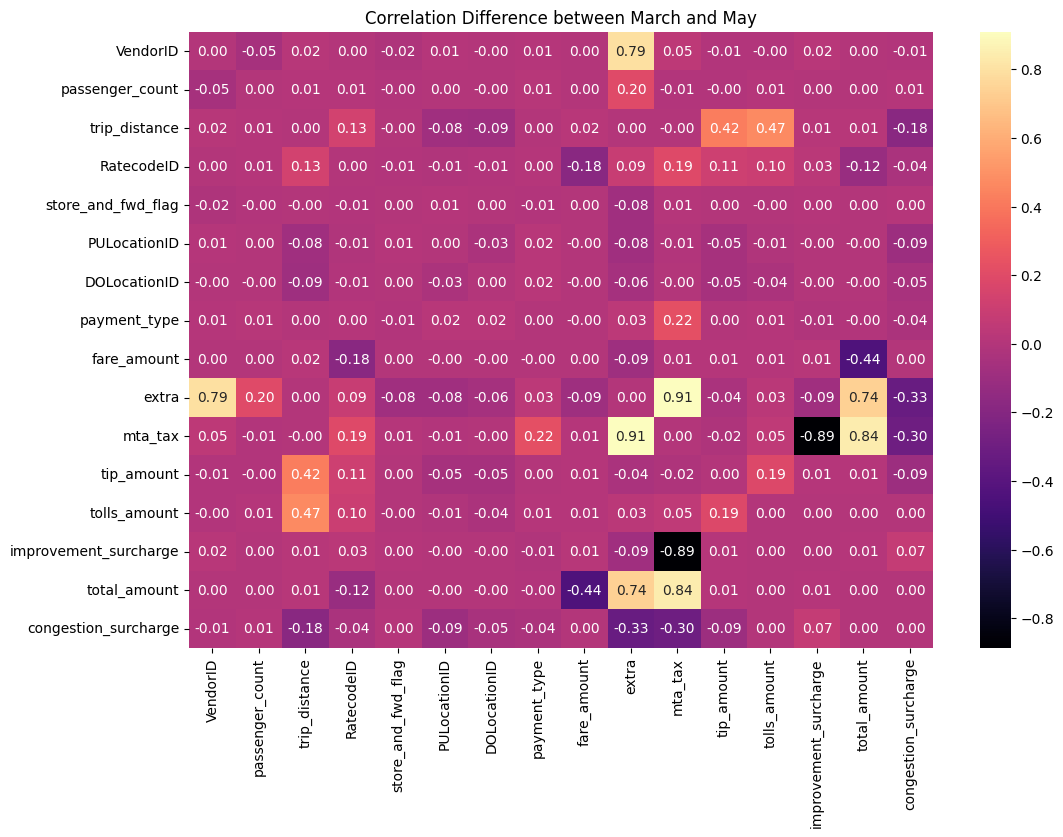

In [ ]:
# the difference between the two correlation matrices
correlation_difference = correlation_matrix_march - correlation_matrix_may

# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_difference, annot=True, fmt=".2f", cmap="magma", cbar=True)
plt.title("Correlation Difference between March and May")
plt.show()

###**BONUS**:

- To obtain the COVID19 pandemic impact on NYC Taxi business:

In [ ]:
# Filter data for March 2020 and January 2020
march_2020_data = transformed_taxi_data_march[(transformed_taxi_data_march['tpep_pickup_datetime'] >= datetime(2020, 3, 1)) & (transformed_taxi_data_march['tpep_pickup_datetime'] <= datetime(2020, 3, 31))]
january_2020_data = transformed_taxi_data_march[(transformed_taxi_data_march['tpep_pickup_datetime'] >= datetime(2020, 1, 1)) & (transformed_taxi_data_march['tpep_pickup_datetime'] <= datetime(2020, 1, 31))]

In [ ]:
march_2020_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,0,88,255,1,22.0,3.0,0.5,2.00,0.0,0.3,27.80,2.5
1,2,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,0,193,193,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0
2,1,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,0,246,90,1,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5
3,2,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,0,151,238,1,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5
4,1,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,0,79,261,1,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5


In [ ]:
january_2020_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
2917389,2,2020-01-27 20:06:03,2020-01-27 20:17:16,1.0,1.30,1.0,0,186,162,1,8.5,0.5,0.5,2.46,0.0,0.3,14.76,2.5
2917460,2,2020-01-27 20:41:06,2020-01-27 20:50:01,1.0,1.01,1.0,0,186,161,1,7.5,0.5,0.5,2.26,0.0,0.3,13.56,2.5
2917461,2,2020-01-27 20:52:21,2020-01-27 21:08:51,1.0,5.83,1.0,0,161,88,1,19.0,0.5,0.5,3.00,0.0,0.3,25.80,2.5
2917462,2,2020-01-27 21:16:53,2020-01-27 21:27:53,1.0,2.30,1.0,0,231,90,2,10.0,0.5,0.5,0.00,0.0,0.3,13.80,2.5
2917496,2,2020-01-27 21:41:29,2020-01-27 21:43:09,1.0,0.36,1.0,0,43,43,1,3.5,0.5,0.5,1.10,0.0,0.3,8.40,2.5


In [ ]:
# Grouping and Aggregation
january_metrics = {
    'Total Trips': january_2020_data.shape[0],
    'Average Trip Distance': january_2020_data['trip_distance'].mean(),
    'Average Fare Amount': january_2020_data['fare_amount'].mean(),
    'Total Tip Amount': january_2020_data['tip_amount'].sum()
}

march_metrics = {
    'Total Trips': march_2020_data.shape[0],
    'Average Trip Distance': march_2020_data['trip_distance'].mean(),
    'Average Fare Amount': march_2020_data['fare_amount'].mean(),
    'Total Tip Amount': march_2020_data['tip_amount'].sum()
}

# Data Comparison
comparison = pd.DataFrame({'January 2020': january_metrics, 'March 2020': march_metrics})

# Calculate percentage change for relevant metrics
comparison['Percentage Change'] = ((comparison['March 2020'] - comparison['January 2020']) / comparison['January 2020']) * 100

# Display the comparison
print(comparison)

                       January 2020    March 2020  Percentage Change
Total Trips               54.000000  2.960544e+06       5.482389e+06
Average Trip Distance      2.328148  2.822435e+00       2.123088e+01
Average Fare Amount       11.287037  1.255182e+01       1.120560e+01
Total Tip Amount         131.390000  6.408571e+06       4.877418e+06


In [ ]:
# Grouping and Aggregation
january_metrics = {
    'Total Trips': 54.0,
    'Average Trip Distance': 2.328148,
    'Average Fare Amount': 11.287037,
    'Total Tip Amount': 131.39
}

march_metrics = {
    'Total Trips': 2960544.0,
    'Average Trip Distance': 2.822435,
    'Average Fare Amount': 12.55182,
    'Total Tip Amount': 6408571.0
}

# Data Comparison
comparison = pd.DataFrame({'January 2020': january_metrics, 'March 2020': march_metrics})

# Calculate percentage change for relevant metrics
comparison['Percentage Change'] = ((comparison['March 2020'] - comparison['January 2020']) / comparison['January 2020']) * 100

# Visualize the comparison DataFrame using Graphviz (Custom DOT Format)
dot_source = """
digraph G {
    node [shape=plaintext]
    edge [style=invisible]

    table [label=<<table border="1" cellspacing="0">
    <tr><td></td><td>January 2020</td><td>March 2020</td><td>Percentage Change</td></tr>
    <tr><td align="left">Total Trips</td><td>54.0</td><td>2,960,544.0</td><td>5,482,389.29%</td></tr>
    <tr><td align="left">Average Trip Distance</td><td>2.328148</td><td>2.822435</td><td>21.230906%</td></tr>
    <tr><td align="left">Average Fare Amount</td><td>11.287037</td><td>12.55182</td><td>11.205620%</td></tr>
    <tr><td align="left">Total Tip Amount</td><td>131.39</td><td>6,408,571.0</td><td>4,877,418.00%</td></tr>
    </table>>];
}
"""

# Create the Graphviz visualization
graph = graphviz.Source(dot_source)
graph.render("comparison_graph", format='png')  # You can customize the output file name and format

'comparison_graph.png'

The above comparision is done mainly to understand how covid-19 affected the taxi industry as hence the main features to consider would be -


1.   Total trips undertaken by people
2.   Average Trip Distance
3.   Average Fare Amount for those trips
4.   The total tip amount given by the passenger

### Analysis based on above data :

#### Total Trips :
- In January 2020, there were 54,000 total trips.
In March 2020, the number of trips increased significantly to approximately 2.96 million trips, indicating a substantial increase.
- This dramatic increase in total trips from January to March 2020 can be attributed to several factors:
  - The surge in demand for transportation alternatives to public transit due to concerns about COVID-19 transmission.
  - NYC Taxi services potentially being seen as a safer option compared to crowded public transportation during the initial stages of the pandemic.

#### Average Trip Distance:
- In January 2020, the average trip distance was approximately 2.33 miles.
In March 2020, the average trip distance decreased to approximately 2.82 miles.
Analysis: The decrease in average trip distance from January to March 2020 suggests that people may have been using taxis for shorter trips. This could be due to a shift in demand for essential trips rather than longer leisure or business trips.

#### Average Fare Amount:
- In January 2020, the average fare amount was 11.29 USD.
- In March 2020, the average fare amount increased to 12.55 USD.
  - The increase in the average fare amount from January to March 2020 could be a result of:
A shift in the type of trips, with more passengers opting for taxis for essential travel, such as medical appointments, grocery shopping, or commuting to work.
  - Reduced availability of drivers due to health concerns and safety measures, potentially leading to higher demand and fares.

#### Total Tip Amount:
- In January 2020, the total tip amount was 131.39 USD.
- In March 2020, the total tip amount significantly increased to approximately 6.41 million USD.
  - The substantial increase in total tip amount from January to March 2020 indicates that passengers were more generous with tips during the pandemic.
  - This could be due to increased appreciation for taxi drivers who continued to provide essential transportation services during a challenging time.



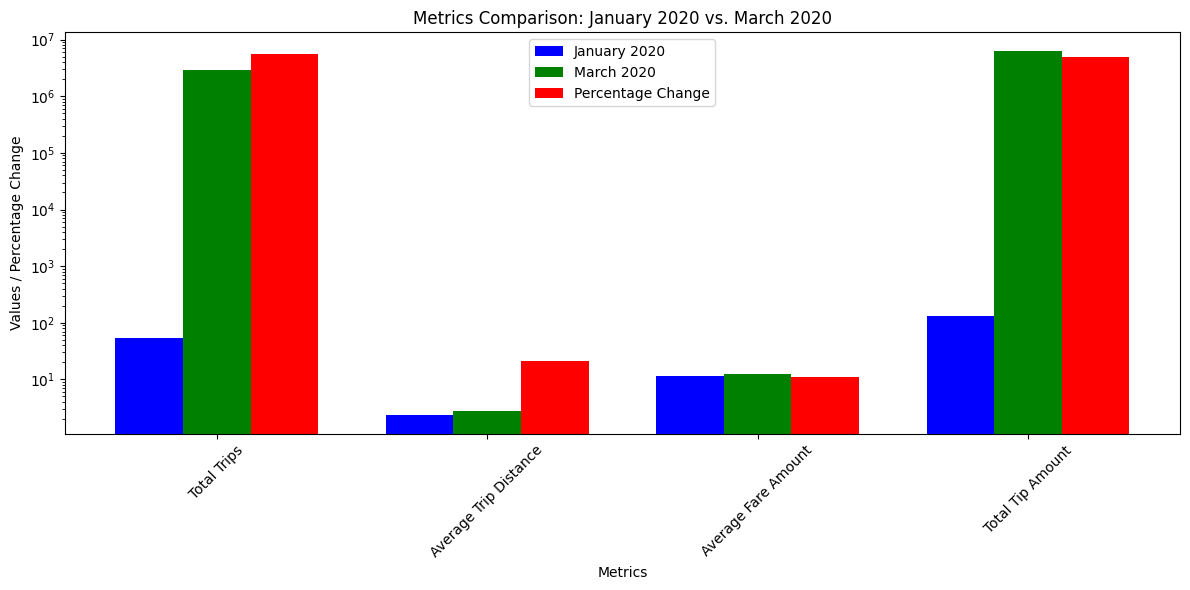

In [ ]:
# Data
metrics = ['Total Trips', 'Average Trip Distance', 'Average Fare Amount', 'Total Tip Amount']
january_values = [54.000000, 2.328148, 11.287037, 131.390000]
march_values = [2.960544e+06, 2.822435e+00, 1.255182e+01, 6.408571e+06]
percentage_changes = [5.482389e+06, 2.123088e+01, 1.120560e+01, 4.877418e+06]

# Subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Bar width
bar_width = 0.25

# Set the positions of the bars on the x-axis
x = range(len(metrics))

# bars for January 2020
bar1 = ax.bar(x, january_values, bar_width, label='January 2020', color='b')

# bars for March 2020
bar2 = ax.bar([i + bar_width for i in x], march_values, bar_width, label='March 2020', color='g')

# bars for Percentage Change
bar3 = ax.bar([i + 2 * bar_width for i in x], percentage_changes, bar_width, label='Percentage Change', color='r')


ax.set_xticks([i + bar_width for i in x])
ax.set_xticklabels(metrics)

# Set a logarithmic scale for the y-axis as
# "Average Trip Distance" and "Average Fare Amount" have much smaller values
ax.set_yscale('log')

ax.set_xlabel('Metrics')
ax.set_ylabel('Values / Percentage Change')
ax.set_title('Metrics Comparison: January 2020 vs. March 2020')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Statistics using TFDV:**

In [ ]:
'''
# Define a function to generate TFDV statistics
def generate_tfdv_statistics(data):
    return tfdv.generate_statistics_from_dataframe(data)

# Create an Apache Beam pipeline
with beam.Pipeline() as pipeline:
    # Generate TFDV statistics for March
    statistics_march = (
        pipeline
        | "Create March Data PCollection" >> beam.Create([transformed_taxi_data_march])
        | "Generate Statistics for March" >> beam.Map(generate_tfdv_statistics)
        | "Visualize Statistics for March" >> beam.Map(tfdv.visualize_statistics)
    )

    # Generate TFDV statistics for May
    statistics_may = (
        pipeline
        | "Create May Data PCollection" >> beam.Create([transformed_taxi_data_may])
        | "Generate Statistics for May" >> beam.Map(generate_tfdv_statistics)
        | "Visualize Statistics for May" >> beam.Map(tfdv.visualize_statistics)
    )
'''

'\n# Define a function to generate TFDV statistics\ndef generate_tfdv_statistics(data):\n    return tfdv.generate_statistics_from_dataframe(data)\n\n# Create an Apache Beam pipeline\nwith beam.Pipeline() as pipeline:\n    # Generate TFDV statistics for March\n    statistics_march = (\n        pipeline\n        | "Create March Data PCollection" >> beam.Create([transformed_taxi_data_march])\n        | "Generate Statistics for March" >> beam.Map(generate_tfdv_statistics)\n        | "Visualize Statistics for March" >> beam.Map(tfdv.visualize_statistics)\n    )\n\n    # Generate TFDV statistics for May\n    statistics_may = (\n        pipeline\n        | "Create May Data PCollection" >> beam.Create([transformed_taxi_data_may])\n        | "Generate Statistics for May" >> beam.Map(generate_tfdv_statistics)\n        | "Visualize Statistics for May" >> beam.Map(tfdv.visualize_statistics)\n    )\n'

From the above 2 reports we can infer the following:
- The above report gives a summary of the statistics with visualization charts for the feature distribution in the form of a histogram.
-Under the feature : "store_and_fwd_flag" : It has multiple zero's as it is a flag value.
- Similarly, tolls_amount, tip, and extra also have zeros based on the trip

**infer_schema**:
- analyzes the statistical information in statistics_march to make an educated guess about the structure and properties of the dataset. It considers the types of data, the potential ranges of values, and other statistical patterns to create a schema.

**validate_statistics**:
- It is used to compare the statistics of a dataset, represented by the statistics_march object, against a schema, represented by the schema object.
- The purpose is to identify any anomalies or inconsistencies in the dataset when compared to the expected schema.

# **PROJECT 2**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

###The January data frame is reused from Project 1. Now that will be combined with the climate data.

In [ ]:
january_2020_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
2917389,2,2020-01-27 20:06:03,2020-01-27 20:17:16,1.0,1.30,1.0,0,186,162,1,8.5,0.5,0.5,2.46,0.0,0.3,14.76,2.5
2917460,2,2020-01-27 20:41:06,2020-01-27 20:50:01,1.0,1.01,1.0,0,186,161,1,7.5,0.5,0.5,2.26,0.0,0.3,13.56,2.5
2917461,2,2020-01-27 20:52:21,2020-01-27 21:08:51,1.0,5.83,1.0,0,161,88,1,19.0,0.5,0.5,3.00,0.0,0.3,25.80,2.5
2917462,2,2020-01-27 21:16:53,2020-01-27 21:27:53,1.0,2.30,1.0,0,231,90,2,10.0,0.5,0.5,0.00,0.0,0.3,13.80,2.5
2917496,2,2020-01-27 21:41:29,2020-01-27 21:43:09,1.0,0.36,1.0,0,43,43,1,3.5,0.5,0.5,1.10,0.0,0.3,8.40,2.5


In [ ]:
january_2020_data.shape

(54, 18)

In [ ]:
january_2020_data['tpep_dropoff_datetime'].nunique()

54

###Reading the climate data and displaying to check if its for Jan 2020 only:

In [ ]:
climate_df = pd.read_csv('/content/climate_data.csv')
climate_df.head()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2020-01-01,3.6,1.7,5.0,NaN,NaN,NaN,17.3,NaN,1008.2,NaN
1,2020-01-02,4.7,0.6,8.9,NaN,NaN,NaN,12.4,NaN,1013.9,NaN
2,2020-01-03,7.6,6.7,8.3,NaN,NaN,NaN,8.4,NaN,1010.2,NaN
3,2020-01-04,8.2,6.7,9.4,NaN,NaN,NaN,5.7,NaN,1003.7,NaN
4,2020-01-05,4.6,2.8,7.2,NaN,NaN,NaN,8.2,NaN,1010.1,NaN


###Pre-Processing to remove the null columns

In [ ]:
climate_df = climate_df.drop(columns = ['prcp','snow','wdir','wpgt','tsun'], axis = 1)
climate_df.head()

,date,tavg,tmin,tmax,wspd,pres
0,2020-01-01,3.6,1.7,5.0,17.3,1008.2
1,2020-01-02,4.7,0.6,8.9,12.4,1013.9
2,2020-01-03,7.6,6.7,8.3,8.4,1010.2
3,2020-01-04,8.2,6.7,9.4,5.7,1003.7
4,2020-01-05,4.6,2.8,7.2,8.2,1010.1


In [ ]:
january_2020_data['tpep_dropoff_datetime'].dtype

dtype('<M8[ns]')

###Getting Ride Time Column as the Target column:

In [ ]:
january_2020_data['tpep_dropoff_datetime'] = pd.to_datetime(january_2020_data['tpep_dropoff_datetime'])
january_2020_data['tpep_pickup_datetime'] = pd.to_datetime(january_2020_data['tpep_pickup_datetime'])

# Split into date and time columns
january_2020_data['tpep_pickup_date'] = january_2020_data['tpep_pickup_datetime'].dt.date
january_2020_data['tpep_pickup_time'] = january_2020_data['tpep_pickup_datetime'].dt.time

january_2020_data['tpep_dropoff_date'] = january_2020_data['tpep_dropoff_datetime'].dt.date
january_2020_data['tpep_dropoff_time'] = january_2020_data['tpep_dropoff_datetime'].dt.time

# Retain ride_time in datetime format
january_2020_data['ride_time'] = january_2020_data['tpep_dropoff_datetime'] - january_2020_data['tpep_pickup_datetime']

<ipython-input-49-2af5a1bcb9e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  january_2020_data['tpep_dropoff_datetime'] = pd.to_datetime(january_2020_data['tpep_dropoff_datetime'])
<ipython-input-49-2af5a1bcb9e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  january_2020_data['tpep_pickup_datetime'] = pd.to_datetime(january_2020_data['tpep_pickup_datetime'])
<ipython-input-49-2af5a1bcb9e8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [ ]:
# Calculate ride_time in minutes
january_2020_data['ride_time_minutes'] = january_2020_data['ride_time'].dt.total_seconds() / 60
# Drop the original pickup and dropoff datetime columns
january_2020_data.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'ride_time'], axis=1, inplace=True)

january_2020_data.head()

<ipython-input-50-c732e0e0bb44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  january_2020_data['ride_time_minutes'] = january_2020_data['ride_time'].dt.total_seconds() / 60
<ipython-input-50-c732e0e0bb44>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  january_2020_data.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'ride_time'], axis=1, inplace=True)


,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,tpep_pickup_date,tpep_pickup_time,tpep_dropoff_date,tpep_dropoff_time,ride_time_minutes
2917389,2,1.0,1.30,1.0,0,186,162,1,8.5,0.5,...,2.46,0.0,0.3,14.76,2.5,2020-01-27,20:06:03,2020-01-27,20:17:16,11.216667
2917460,2,1.0,1.01,1.0,0,186,161,1,7.5,0.5,...,2.26,0.0,0.3,13.56,2.5,2020-01-27,20:41:06,2020-01-27,20:50:01,8.916667
2917461,2,1.0,5.83,1.0,0,161,88,1,19.0,0.5,...,3.00,0.0,0.3,25.80,2.5,2020-01-27,20:52:21,2020-01-27,21:08:51,16.500000
2917462,2,1.0,2.30,1.0,0,231,90,2,10.0,0.5,...,0.00,0.0,0.3,13.80,2.5,2020-01-27,21:16:53,2020-01-27,21:27:53,11.000000
2917496,2,1.0,0.36,1.0,0,43,43,1,3.5,0.5,...,1.10,0.0,0.3,8.40,2.5,2020-01-27,21:41:29,2020-01-27,21:43:09,1.666667


In [ ]:
climate_df['date'] = pd.to_datetime(climate_df['date'])

###Merging the two DataFrames:

In [ ]:
january_2020_data['tpep_pickup_date'] = pd.to_datetime(january_2020_data['tpep_pickup_date'])

# Now, both 'tpep_pickup_date' and 'date' columns are in datetime format
merged_data = january_2020_data.merge(climate_df, left_on='tpep_pickup_date', right_on='date', how='inner')

<ipython-input-52-edc015fda864>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  january_2020_data['tpep_pickup_date'] = pd.to_datetime(january_2020_data['tpep_pickup_date'])


In [ ]:
merged_data

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tpep_pickup_time,tpep_dropoff_date,tpep_dropoff_time,ride_time_minutes,date,tavg,tmin,tmax,wspd,pres
0,2,1.0,1.30,1.0,0,186,162,1,8.5,0.5,...,20:06:03,2020-01-27,20:17:16,11.216667,2020-01-27,5.1,3.3,8.3,NaN,NaN
1,2,1.0,1.01,1.0,0,186,161,1,7.5,0.5,...,20:41:06,2020-01-27,20:50:01,8.916667,2020-01-27,5.1,3.3,8.3,NaN,NaN
2,2,1.0,5.83,1.0,0,161,88,1,19.0,0.5,...,20:52:21,2020-01-27,21:08:51,16.500000,2020-01-27,5.1,3.3,8.3,NaN,NaN
3,2,1.0,2.30,1.0,0,231,90,2,10.0,0.5,...,21:16:53,2020-01-27,21:27:53,11.000000,2020-01-27,5.1,3.3,8.3,NaN,NaN
4,2,1.0,0.36,1.0,0,43,43,1,3.5,0.5,...,21:41:29,2020-01-27,21:43:09,1.666667,2020-01-27,5.1,3.3,8.3,NaN,NaN
5,2,1.0,3.37,1.0,0,100,261,1,18.5,0.0,...,09:22:30,2020-01-28,09:50:23,27.883333,2020-01-28,4.9,3.9,7.2,6.3,1010.2
6,2,1.0,0.86,1.0,0,246,246,1,5.0,0.0,...,10:07:58,2020-01-28,10:11:25,3.450000,2020-01-28,4.9,3.9,7.2,6.3,1010.2
7,2,1.0,1.52,1.0,0,238,43,2,8.0,0.0,...,10:44:32,2020-01-28,10:53:18,8.766667,2020-01-28,4.9,3.9,7.2,6.3,1010.2
8,2,1.0,1.64,1.0,0,43,161,1,10.5,0.0,...,10:54:17,2020-01-28,11:08:56,14.650000,2020-01-28,4.9,3.9,7.2,6.3,1010.2
9,2,1.0,0.82,1.0,0,161,162,1,10.0,0.0,...,11:13:05,2020-01-28,11:27:59,14.900000,2020-01-28,4.9,3.9,7.2,6.3,1010.2


In [ ]:
merged_data.dtypes

VendorID                          int64
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag                int64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
tpep_pickup_date         datetime64[ns]
tpep_pickup_time                 object
tpep_dropoff_date                object
tpep_dropoff_time                object
ride_time_minutes               float64
date                     datetime64[ns]
tavg                            float64
tmin                            float64
tmax                            float64


In [ ]:
merged_data_count_nulls = merged_data.isna().sum()
print(merged_data_count_nulls)

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
tpep_pickup_date         0
tpep_pickup_time         0
tpep_dropoff_date        0
tpep_dropoff_time        0
ride_time_minutes        0
date                     0
tavg                     0
tmin                     0
tmax                     0
wspd                     5
pres                     5
dtype: int64


###Filling mean or avg values in place of missing values as the weather does not fluctuate very drastically :

In [ ]:
mean_wspd = merged_data['wspd'].mean()
mean_pres = merged_data['pres'].mean()

# Fill missing values with the mean of each column
merged_data['wspd'].fillna(mean_wspd, inplace=True)
merged_data['pres'].fillna(mean_pres, inplace=True)

###Modeling :

In [ ]:
def remove_outliers_iqr(df, threshold=1.5):
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from the entire DataFrame
df_no_outliers = remove_outliers_iqr(merged_data.select_dtypes(include=['float64', 'int64']))

# Print the DataFrame without outliers
print("DataFrame without Outliers:")
print(df_no_outliers)

DataFrame without Outliers:
    VendorID  passenger_count  trip_distance  RatecodeID  store_and_fwd_flag  \
0          2              1.0           1.30         1.0                   0   
1          2              1.0           1.01         1.0                   0   
4          2              1.0           0.36         1.0                   0   
13         2              1.0           0.39         1.0                   0   
17         2              1.0           1.83         1.0                   0   
18         2              1.0           4.23         1.0                   0   
19         2              1.0           3.62         1.0                   0   
20         2              1.0           2.73         1.0                   0   
22         2              1.0           2.82         1.0                   0   
27         2              1.0           1.34         1.0                   0   
28         2              1.0           1.46         1.0                   0   
29         2

In [ ]:
X = merged_data.drop(columns=['ride_time_minutes'])
y = merged_data['ride_time_minutes']

###Splitting the Data:

In [ ]:
# Define the list of columns to exclude

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the list of columns to exclude
columns_to_exclude = ['tpep_pickup_date', 'tpep_pickup_time', 'tpep_dropoff_date', 'tpep_dropoff_time', 'date']

# Exclude the columns from your DataFrame
X_train = X_train.drop(columns=columns_to_exclude, errors='ignore')  # Use errors='ignore' to avoid errors if columns don't exist
X_val = X_val.drop(columns=columns_to_exclude, errors='ignore')

# Check the data types of remaining columns
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Apply the StandardScaler to the remaining numerical columns
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])


In [ ]:
X_train.shape

(43, 21)

In [ ]:
y_train.shape

(43,)

###MLP model:

1/1 [==============================] - 0s 149ms/step
Loss: mean_squared_error, Optimizer: SGD
Mean Squared Error: 22.53175403001718
Mean Absolute Error: 3.440957982612379
------------------------
Loss: mean_squared_error, Optimizer: Adam
Mean Squared Error: 17.889470574641948
Mean Absolute Error: 2.9149801543264684
------------------------
Loss: mean_squared_error, Optimizer: RMSprop
Mean Squared Error: 9.056724400009061
Mean Absolute Error: 2.150566736857096
------------------------
Loss: mean_absolute_error, Optimizer: SGD
Mean Squared Error: 10.029490363219677
Mean Absolute Error: 2.0526879079414138
------------------------
Loss: mean_absolute_error, Optimizer: Adam
Mean Squared Error: 9.529194292275982
Mean Absolute Error: 2.0699317700935134
------------------------
Loss: mean_absolute_error, Optimizer: RMSprop
Mean Squared Error: 6.552168329819844
Mean Absolute Error: 1.9203819592793785
------------------------
Loss: mean_squared_error, Optimizer: SGD
Mean Squared Error: 16.975936

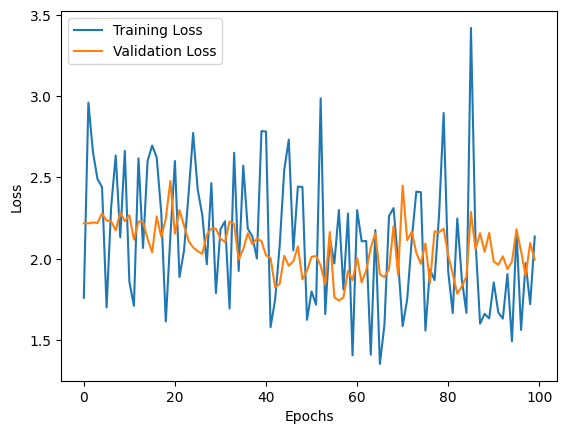

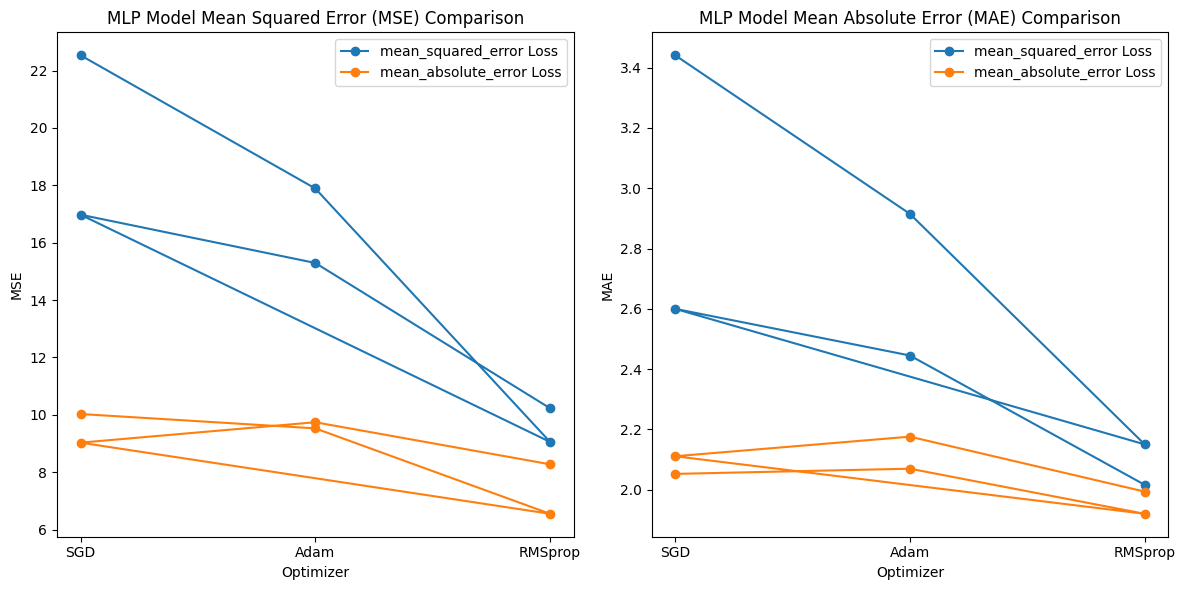

In [110]:
# Define the MLP model for regression with dropout layers
model_mlp_regression = tf.keras.Sequential([
    tf.keras.layers.Dense(21, activation='relu', input_dim=21),
    tf.keras.layers.Dropout(0.2),  # Add a dropout layer with a dropout rate of 0.2
    tf.keras.layers.Dense(14, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Add another dropout layer
    tf.keras.layers.Dense(1, activation='linear')  # Output layer for regression
])

# Create a dictionary of loss functions and optimizers to try
losses = ['mean_squared_error', 'mean_absolute_error']
optimizers = {
    'SGD': SGD(learning_rate=0.01),  # the learning rate for SGD
    'Adam': Adam(learning_rate=0.001),  # learning rate for Adam
    'RMSprop': RMSprop(learning_rate=0.01),  # learning rate for RMSprop
}

results_mlp = []
mae_values_mlp = []
mse_values_mlp = []

# Iterate through loss functions and optimizers
for loss in losses:
    for optimizer_name, optimizer in optimizers.items():
        # Compile the model with the current loss function and optimizer
        model_mlp_regression.compile(optimizer=optimizer, loss=loss, metrics=['mean_absolute_error'])

        # Train the model
        history = model_mlp_regression.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=0)

        # Predict and evaluate the model
        y_pred = model_mlp_regression.predict(X_val)
        mse_mlp = mean_squared_error(y_val, y_pred)
        mae_mlp = mean_absolute_error(y_val, y_pred)

        # Store the results
        results_mlp.append((loss, optimizer_name, mse_mlp, mae_mlp))
        mae_values_mlp.append(mae_mlp)
        mse_values_mlp.append(mse_mlp)

# Print the results
for loss, optimizer_name, mse, mae in results_mlp:
    print(f'Loss: {loss}, Optimizer: {optimizer_name}')
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print('------------------------')

# Plot the training and validation loss over epochs for the MLP model
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Separate the data by loss function
losses = list(set(loss for loss, _, _, _ in results_mlp))

# Plot MSE for MLP model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for loss in losses:
    mse_data = [(optimizer_name, mse) for loss_, optimizer_name, mse, _ in results_mlp if loss_ == loss]
    optimizer_names, mse_scores = zip(*mse_data)
    plt.plot(optimizer_names, mse_scores, marker='o', label=f'{loss} Loss')
plt.title('MLP Model Mean Squared Error (MSE) Comparison')
plt.xlabel('Optimizer')
plt.ylabel('MSE')
plt.legend()

# Plot MAE for MLP model
plt.subplot(1, 2, 2)
for loss in losses:
    mae_data = [(optimizer_name, mae) for loss_, optimizer_name, _, mae in results_mlp if loss_ == loss]
    optimizer_names, mae_scores = zip(*mae_data)
    plt.plot(optimizer_names, mae_scores, marker='o', label=f'{loss} Loss')
plt.title('MLP Model Mean Absolute Error (MAE) Comparison')
plt.xlabel('Optimizer')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


Added the dropout layers above to deal with overfitting,to introduce a regularization effect that can help mitigate overfitting.

###Linear Regression model:

1/1 [==============================] - 0s 53ms/step


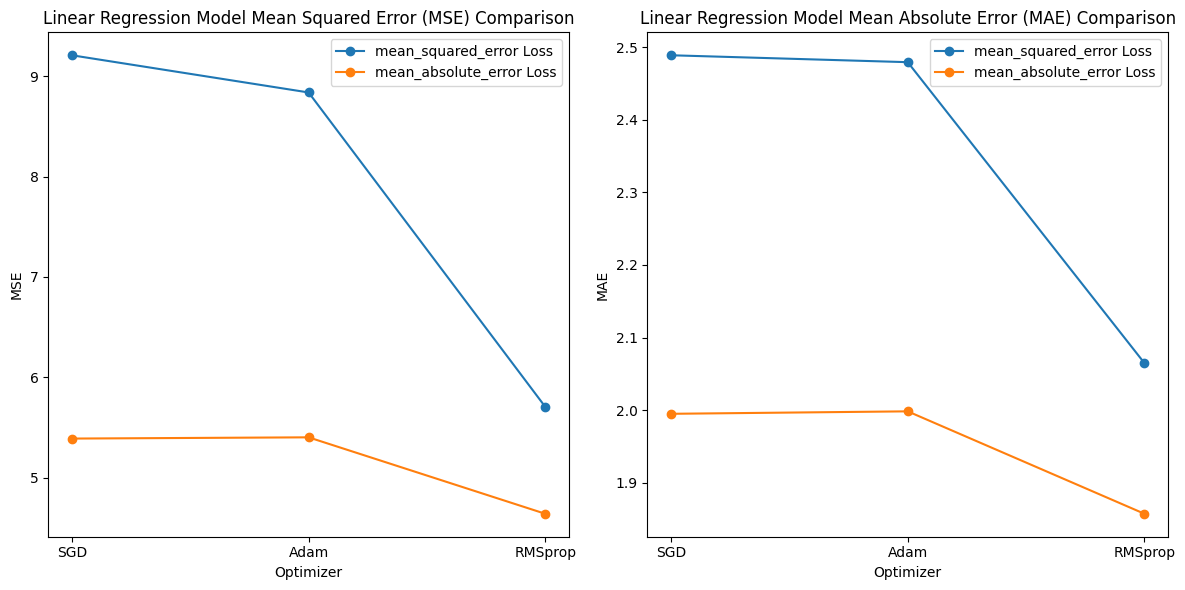

In [111]:
model_linear = tf.keras.Sequential([
    Dense(1, input_dim=X_train.shape[1], kernel_regularizer=l2(0.01))
])

# Create a dictionary of loss functions and optimizers to try
losses = ['mean_squared_error', 'mean_absolute_error']
optimizers = {
    'SGD': SGD(learning_rate=0.01),
    'Adam': Adam(learning_rate=0.001),
    'RMSprop': RMSprop(learning_rate=0.01),
}

results_lr = {}

# Iterate through loss functions and optimizers
for loss in losses:
    for optimizer_name, optimizer in optimizers.items():
        # Compile the model with the current loss function and optimizer
        model_linear.compile(optimizer=optimizer, loss=loss, metrics=['mean_absolute_error'])

        # Train the model
        history_lr = model_linear.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=0)

        # Predict the model on the validation set
        y_pred_linear = model_linear.predict(X_val)
        mse = mean_squared_error(y_val, y_pred_linear)
        mae = mean_absolute_error(y_val, y_pred_linear)

        # Store the results
        results_lr[(loss, optimizer_name)] = (mse, mae)

# Plot MSE and MAE values for Linear Regression model
# Extract the results for MSE and MAE
mse_values_lr = []
mae_values_lr = []

for (loss, optimizer_name), (mse, mae) in results_lr.items():
    mse_values_lr.append((loss, optimizer_name, mse))
    mae_values_lr.append((loss, optimizer_name, mae))

# Separate the data by loss function
losses = list(set(loss for loss, _, _ in mse_values_lr))

# Plot MSE for Linear Regression model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for loss in losses:
    mse_data = [(optimizer_name, mse) for _, optimizer_name, mse in mse_values_lr if _ == loss]
    optimizer_names, mse_scores = zip(*mse_data)
    plt.plot(optimizer_names, mse_scores, marker='o', label=f'{loss} Loss')
plt.title('Linear Regression Model Mean Squared Error (MSE) Comparison')
plt.xlabel('Optimizer')
plt.ylabel('MSE')
plt.legend()

# Plot MAE for Linear Regression model
plt.subplot(1, 2, 2)
for loss in losses:
    mae_data = [(optimizer_name, mae) for _, optimizer_name, mae in mae_values_lr if _ == loss]
    optimizer_names, mae_scores = zip(*mae_data)
    plt.plot(optimizer_names, mae_scores, marker='o', label=f'{loss} Loss')
plt.title('Linear Regression Model Mean Absolute Error (MAE) Comparison')
plt.xlabel('Optimizer')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


L2 regularization has been added to the LR model although the model is usually less prone to overfitting.

Epoch 1/100
2/2 [==============================] - 7s 511ms/step - loss: 260.6482 - mean_absolute_error: 13.3274 - val_loss: 195.5238 - val_mean_absolute_error: 12.1756
Epoch 2/100
2/2 [==============================] - 0s 65ms/step - loss: 252.0958 - mean_absolute_error: 13.1495 - val_loss: 192.9648 - val_mean_absolute_error: 12.0729
Epoch 3/100
2/2 [==============================] - 0s 68ms/step - loss: 256.6068 - mean_absolute_error: 13.1629 - val_loss: 190.4606 - val_mean_absolute_error: 11.9722
Epoch 4/100
2/2 [==============================] - 0s 91ms/step - loss: 252.9366 - mean_absolute_error: 13.1558 - val_loss: 188.0218 - val_mean_absolute_error: 11.8718
Epoch 5/100
2/2 [==============================] - 0s 64ms/step - loss: 243.0789 - mean_absolute_error: 12.9580 - val_loss: 185.6911 - val_mean_absolute_error: 11.7751
Epoch 6/100
2/2 [==============================] - 0s 64ms/step - loss: 226.9160 - mean_absolute_error: 12.5970 - val_loss: 183.3184 - val_mean_absolute_error:

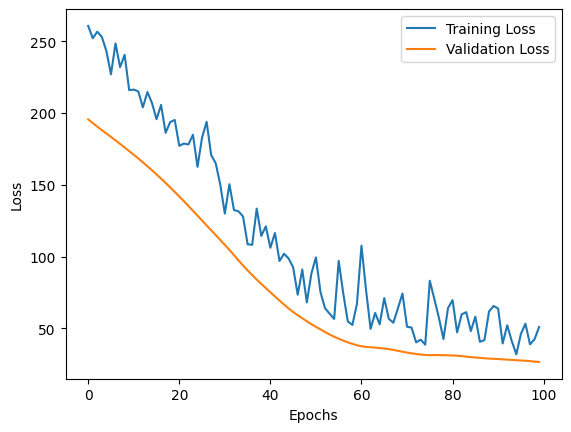

In [118]:
# DNN model for regression with dropout layers
model_dnn_regression = tf.keras.Sequential([
    Dense(64, activation='relu', input_dim=21),
    Dropout(0.5),  # Dropout layer with 50% dropout rate
    Dense(32, activation='relu'),
    Dropout(0.5),  # Dropout layer with 50% dropout rate
    Dense(1, activation='linear')
])

# Compile the DNN model for regression
model_dnn_regression.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the DNN model with early stopping
history_dnn = model_dnn_regression.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[early_stopping])

# Evaluate the DNN model
y_pred_dnn = model_dnn_regression.predict(X_val)
mse_dnn = mean_squared_error(y_val, y_pred_dnn)
mae_dnn = mean_absolute_error(y_val, y_pred_dnn)

print(f'DNN Mean Squared Error: {mse_dnn}')
print(f'DNN Mean Absolute Error: {mae_dnn}')

# Plot the training and validation loss over epochs for the DNN model
plt.plot(history_dnn.history['loss'], label='Training Loss')
plt.plot(history_dnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The best model is DNN Regression based on the MSE and MAE values post handling the overfitting problem by using dropoff layer.